In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import matplotlib.dates as dates

In [2]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2024-12-31')
raw

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2010-01-04    6.440331   86.026451    6.455077   86.071994    6.391279   
2010-01-05    6.451466   86.254158    6.487879   86.292114    6.417459   
2010-01-06    6.348846   86.314911    6.477045   86.527452    6.342226   
2010-01-07    6.337109   86.679276    6.379843   86.785546    6.291066   
2010-01-08    6.379240   86.967690    6.379842   87.005646    6.291368   
...                ...         ...         ...         ...         ...   
2024-12-23  254.989655  594.690002  255.369227  595.299988  253.171646   
2024-12-24  257.916443  601.299988  257.926411  601.340027  255.009620   
2024-12-26  258.735504  601.340027  259.814335  602.479980  257.347047   
2024-12-27  255.309296  595.010010  258.415896  597.780029  252.782075   
2024-12-30  251.923019  588.219971  253.221595  591.739990  250.474615   

Price                         Open                 Volume             
Ticker             SPY        AAPL         SPY       AAPL        SPY  
Date                                                                  
2010-01-04   84.644927    6.422877   85.297736  493729600  118944600  
2010-01-05   85.662077    6.458086   85.973302  601904800  111579900  
2010-01-06   86.102370    6.451466   86.170684  552160000  116074400  
2010-01-07   85.912604    6.372319   86.155509  477131200  131091100  
2010-01-08   86.276931    6.328683   86.451516  447610800  126402800  
...                ...         ...         ...        ...        ...  
2024-12-23  587.659973  254.490204  590.890015   40858800   57635800  
2024-12-24  595.469971  255.209412  596.059998   23234700   33160100  
2024-12-26  598.080017  257.906429  599.500000   27237100   41219100  
2024-12-27  590.760010  257.546826  597.539978   42355300   64969300  
2024-12-30  584.409973  251.952985  587.890015   35557500   56578800  

[3773 rows x 10 columns]

In [3]:
raw.columns


MultiIndex([( 'Close', 'AAPL'),
            ( 'Close',  'SPY'),
            (  'High', 'AAPL'),
            (  'High',  'SPY'),
            (   'Low', 'AAPL'),
            (   'Low',  'SPY'),
            (  'Open', 'AAPL'),
            (  'Open',  'SPY'),
            ('Volume', 'AAPL'),
            ('Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [4]:
raw.iloc[:, ::2].columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [5]:
column = [col[0] for col in raw]
raw.columns= column

In [6]:
raw.iloc[:, ::2].columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [7]:
raw = raw.iloc[:, ::2]
raw

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600
2010-01-05,6.451466,6.487879,6.417459,6.458086,601904800
2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000
2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200
2010-01-08,6.379240,6.379842,6.291368,6.328683,447610800
...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


<Axes: xlabel='Date'>

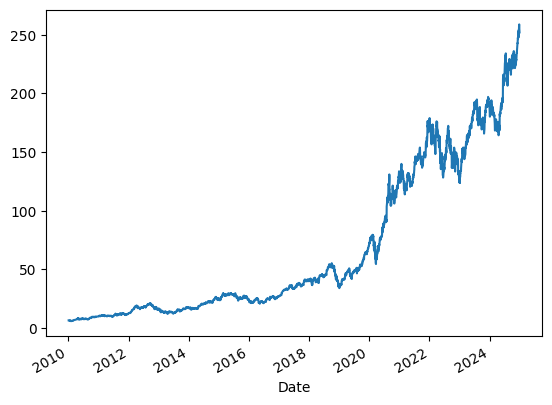

In [8]:
raw.Close.plot()

<Axes: xlabel='Date'>

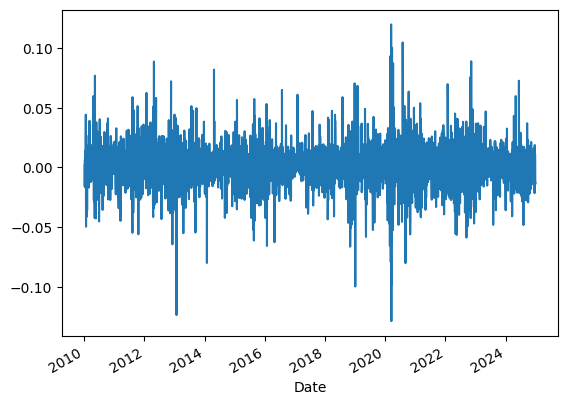

In [9]:
raw.pct_change().Close.plot()

In [12]:
def cumlative_returns(df, col):
    row = df[col]
    return (row.sub(row[0]).div(row[0]))

/tmp/ipykernel_712/2608156303.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (row.sub(row[0]).div(row[0]))


<Axes: xlabel='Date'>

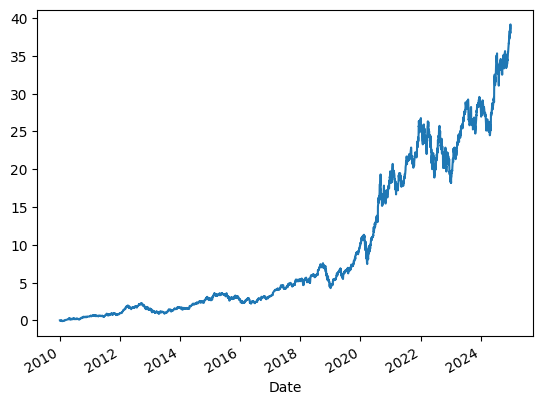

In [13]:
raw.pipe(cumlative_returns,'Close').plot()

In [14]:
raw.assign(cum_returns=lambda df:cumlative_returns(df, 'Close'))

/tmp/ipykernel_712/2608156303.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (row.sub(row[0]).div(row[0]))


,Close,High,Low,Open,Volume,cum_returns
Date,,,,,,
2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600,0.000000
2010-01-05,6.451466,6.487879,6.417459,6.458086,601904800,0.001729
2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000,-0.014205
2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200,-0.016027
2010-01-08,6.379240,6.379842,6.291368,6.328683,447610800,-0.009486
...,...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,38.592629
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,39.047076
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,39.174253


In [20]:
def mybar(row, ax):
    ax.bar(row.index, row)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return row

/tmp/ipykernel_712/2608156303.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (row.sub(row[0]).div(row[0]))


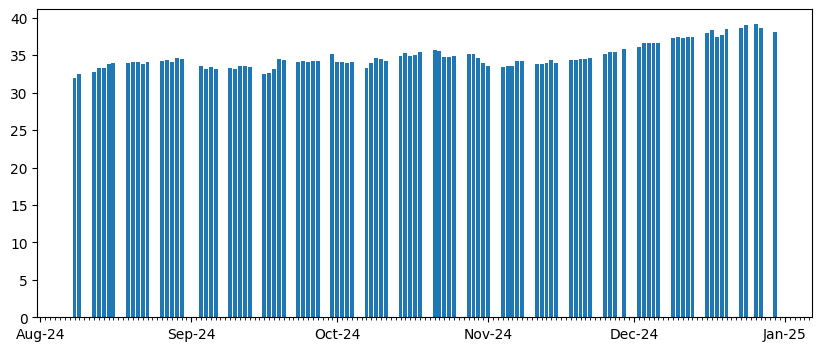

In [21]:
fig, ax = plt.subplots(figsize=(10,4))
_=raw.pipe(cumlative_returns,'Close').iloc[-100:].pipe(mybar, ax)